<a href="https://colab.research.google.com/github/Jyotibaberwal/Matrix-computation-for-data-science/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**Write a function to implement the Power method for any given square matrix of
arbitrary size. Using the function, find the dominant eigenvalue and
corresponding eigenvector for the following matrices**

**a. [[8,-6,2],[-6,7,-4],[2,-4,3]]**

**b. A randomly generated symmetric matrix of size nxn**

**Take the initial vector as [1,1,...,1]T and terminate the iteration if the
consecutive iteration values are very close or after maximum iterations.**

**Reference Reading -** https://ergodic.ugr.es/cphys/lecciones/fortran/power_method.pdf

In [ ]:
import numpy as np

# Randomly genrate symmentric matrix
def random_matrix(n):
  mat = np.random.rand(n,n)
  symmetric_mat = (mat+mat.T)/2
  return symmetric_mat

# Power iteration method with scaling
def X(m, A):
    n = len(A)
    x = np.ones(n)
    max_val = None

    for _ in range(m):
        x = np.dot(A, x)
        max_val = np.max(x)
        x /= max_val

    return x, max_val


A = np.array([[8, -6, 2],
              [-6, 7, -4],
              [2, -4, 3]])

for i in range(10):
    X_vector, max_val = X(i, A)
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print("\n")

print("\n\n\n")
print("For symmetric matrix\n")
for i in range(10):

    X_vector, max_val = X(i, random_matrix(3))
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print()



# Question 2
**(PageRank problem) Assume that a Web contains 6 pages only. The author of
Page 1 thinks pages 2, 4, 5, and 6 have good content, and links to them. The
author of Page 2 only likes pages 3 and 4 so only links from her page to them.
The links between these and the other pages in this web are summarized in the
following diagram.**
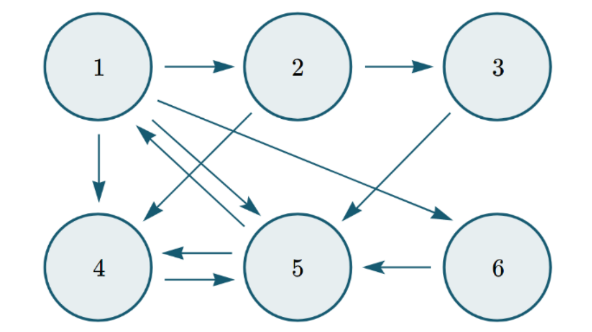



**Find out which page among all six will appear at the top of the search results.**

  **Hint:**

  **a. Compute the associated matrix to the above system.**

  **b. Find the maximum eigenvalue of the associated matrix.**

  **c. Find the corresponding eigenvector to the maximum eigenvalue.**

  **d. The component with maximum magnitude in the eigenvector will have the highest rank.**

**Use the function from problem 1 to find the max eigenvalue and corresponding eigenvector. Also, look for any use case or real-life problem where one mightcare to find the highest eigenvalue.**




In [ ]:

def X(m, A):
    n = len(A)
    x = np.array([1/n]*n)
    max_val = None

    for _ in range(m):
        x = np.dot(A, x)
        max_val = np.max(x)
        x /= max_val

    return x, max_val


A = np.array([[0,0,0,0,1/2,0],
              [1/4,0,0,0,0,0],
              [0,1/2,0,0,0,0],
              [1/4,1/2,0,0,1/2,0],
              [1/4,0,1,1,0,1],
              [1/4,0,0,0,0,0]])

'''for i in range(20):
    X_vector, max_val = X(i, A)
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print("\n")
'''
m = 10
page_rank,eigen_Value = X(m,A)


print("page_rank",page_rank)
print("highest_page_rank",np.argmax(page_rank)+1)


page_rank [0.51073303 0.12401042 0.0645778  0.69932125 1.         0.12401042]
highest_page_rank 5


# Question 3
**Given a simple quadratic optimization problem of the form:

 **![](https://latex.codecogs.com/svg.image?\bg{white}&space;f(x)=ax^2&plus;bx&plus;c)**

where a, b, and c are constants. Find the value of x that minimizes f (x).**

**a. Implement the gradient descent algorithm to minimize the above quadratic
function.**

**b. Extend the implementation to include L1 and L2 norms as regularization
terms, resulting in the following objective functions:**

**a.) (L1 - Regularization)**

**b.) (L2 - Regularization)**

**where λ is a regularization term.**

**c. Compare the convergence rates (i.e., how quickly the algorithm finds the
minimum) for the three objective functions (original, L1- regularized, and
L2-regularized).**

**d. Analyze the differences in the solutions obtained for different values of λ
in the regularized cases.**

**e. Discuss the findings and insights into how different norms affect the
optimization process.**

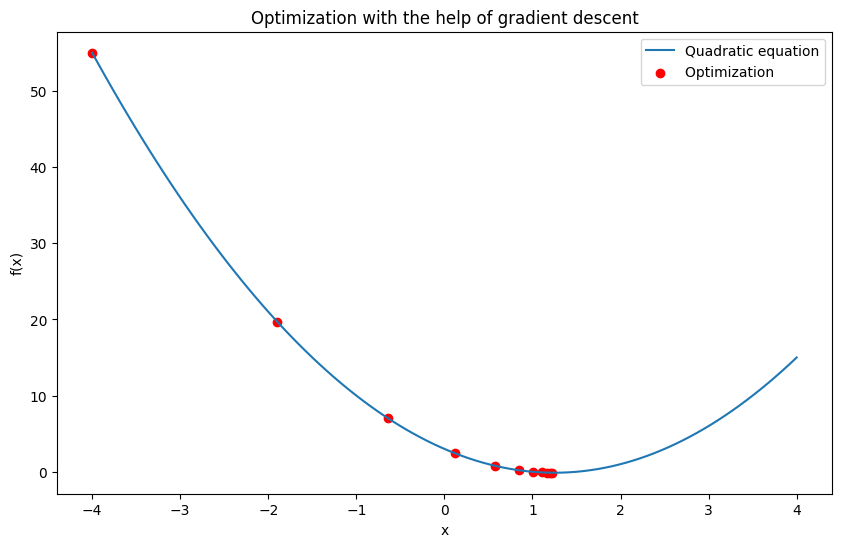

In [54]:
import numpy as np
import matplotlib.pyplot as plt

  #f(x) = ax^2 + bx + c
def quadratic_eq(a,b,c,x):
  f_x = a*x**2 + b*x +c
  return f_x

def gradient_f(x,a,b):
  f_x = (2*a*x) + b
  return f_x

def gradient_descent(a,b,c,l_r,epochs):
  x = -4  #initial guess
  x_values = [x]
  f_x_values = [quadratic_eq(a,b,c,x)]  #f(x) for x
  for i in range(epochs):
    gradient = gradient_f(x,a,b)
    x = x - l_r*(gradient)
    x_values.append(x)
    f_x_values.append(quadratic_eq(a,b,c,x))
  return x_values,f_x_values

#example
a = 2
b = -5
c = 3
lr = 0.1
epochs = 10
x_values , f_x_values = gradient_descent(a,b,c,lr,epochs)


x_range = np.linspace(-4,4,100)
y_values = quadratic_eq(a,b,c,x_range)

plt.figure(figsize=(10,6))
plt.plot(x_range,y_values,label = 'Quadratic equation')
plt.scatter(x_values,f_x_values,color ='red',label ="Optimization ")
plt.title('Optimization with the help of gradient descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()